In [1]:
    import pandas as pd
    %matplotlib inline
    import matplotlib.pyplot as plt

    import seaborn as sn
    import matplotlib.pyplot as plt
    import numpy as np

    from sklearn.model_selection import train_test_split 
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics

    from IPython.display import display, HTML
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"

    pd.options.display.max_columns = None

### Read in the source data and convert for data manipulation

In [2]:
# Read in the source data
model = pd.read_excel(r'C:\Users\bruno.henderyckx\Dropbox (UniForum)\Consulting\CAN\2020\6. Uni Specific\92U (CGY)\HR review\Analysis\200519.2 UniForum HR data dump.xlsx',sheet_name='clustering_data')
sdm = pd.read_excel(r'C:\Users\bruno.henderyckx\Desktop\FM\SDM_data.xlsx')

sdm.astype({'Collection Period': 'int'}).dtypes
sdm = sdm.rename(columns={"Collection Period": "Year"})

region_mapping = pd.read_excel(r'C:\Users\bruno.henderyckx\Dropbox (UniForum)\Consulting\CAN\2020\6. Uni Specific\92U (CGY)\HR review\Analysis\200519.1 Uni Parameters.xlsx',sheet_name='Parameters') 

# Filter the aggregated-uni & Year model outputs from the dataframe
model['Uni'].unique()
uni_to_include = ['05B', '06C', '07N', '08O', '09F', '10Ne', '11Na', '12Mg', '13Al',
       '14Si', '15P', '16S', '17Cl', '18Ar', '19K', '20Ca', '21Sc',
       '22Ti', '23V','24Cr', '25Mn','26Fe', '01H', '27Co', '28Ni', '29Cu', '30Zn', '38Sr', '39Y',
       '41Nb', '42Mo', '44Ru', '45Rh', '46Pd', '47Ag','37Rb', '40Zr', '48Cd', '49In', '51Sb', '53I', '54Xe', '43Tc',
       '52Te', '55Cs', '87Fr', '88Ra', '89Ac','57La', '58Ce','59Pr', '90Th', '91Pa']

year_to_include = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

model['Year'].unique()

model = model[model['Uni'].isin(uni_to_include)]
model = model[model['Year'].isin(year_to_include)]

#model.astype({'Year': 'int'}).dtypes
model['Year'] = model['Year'].astype(int)
model.head(15)

Collection Period               int32
Region                         object
University Code                object
Latest Activity Collection     object
Service Grouping Name          object
Function Name                  object
Sub-function Name              object
Activity Name                  object
Activity Type                  object
Role Category                  object
Employment Type                object
Position Type                  object
Org Scope                      object
Org Primary Function           object
Function Alignment             object
Function Focus                 object
Sub-function Focus             object
Activity Focus                 object
Competency Band                object
Total Employment Cost Band     object
Time Allocation Category       object
Direct Reports Category        object
Own Uni - Cost (CAD M)        float64
wFTE                          float64
dtype: object

array(['05B', '06C', '07N', '08O', '09F', '10Ne', '11Na', '12Mg', '13Al',
       '14Si', '15P', '16S', '17Cl', '18Ar', '19K', '20Ca', '21Sc',
       '22Ti', '23V', 'Ave ANZ', 'Ave ANZ Collected 2012-2016',
       'Ave ANZ Collected 2018 Group (excl. 17Cl and 05B)',
       'Ave ANZ Collected 2018 Group (excl. 17Cl)',
       'Ave ANZ Collected since 2012', 'Ave ANZ Collected since 2015',
       'Ave AUS', 'Ave First ANZ Chg Group (06C, 08O, 09F, 22Ti)',
       'Ave First ANZ Chg Group incl. 16S (06C, 08O, 09F, 22Ti and 16S)',
       'Ave Global', 'Ave Go5', 'Ave Go8', 'Ave Go8 exc. 21Sc',
       'Ave Go8 excl. 14Si and 21Sc',
       'Ave Non-Go8 ANZ Collected 2018 Group (excl. 17Cl)',
       'Ave Non-Go8 Aus Only', 'Ave Non-Go8 Aus Only (ex 15P)', 'Ave NZ',
       'Ave Second ANZ Chg Group (05B, 07N, 13Al)', '24Cr', '25Mn',
       '26Fe', '01H', '27Co', '28Ni', '29Cu', '30Zn', '38Sr', '39Y',
       '41Nb', '42Mo', '44Ru', '45Rh', '46Pd', '47Ag',
       'Ave UK 15&17 (38Sr, 39Y, 41Nb, 42M

array(['2012', '2013', '2014', '2015', '2016', '2016-2018', '2017',
       '2017-2019', '2018', '2019'], dtype=object)

,Year,Uni,Metric,Actual Cost,Norm Cost,Actual WFTE,Norm WFTE
0,2012,05B,010. Governance,49.065142,96.436660,411.6208,85.573910
1,2012,05B,010. Governance (Ops NTx),33.853111,107.304502,283.9434,93.440343
2,2012,05B,010. Governance (Ops NTx) (inc FI10ExtSupMgmt),35.359161,106.121424,298.4783,92.424617
3,2012,05B,010. Governance (Ops NTx+Hy),33.853111,107.304502,283.9434,93.440343
4,2012,05B,010. Governance (Ops Tx),4.434955,89.429518,38.8651,79.797837
5,2012,05B,010. Governance (Ops),38.288066,104.876393,322.8085,91.555810
6,2012,05B,010. Governance (Ops) (inc FI10ExtSupMgmt),39.794115,103.958918,337.3434,90.769873
7,2012,05B,010.10 Plan&Policy,10.980239,88.528755,83.9851,77.991799
8,2012,05B,010.20 Rpting&Comms,6.852174,108.988223,63.5762,98.000006
9,2012,05B,010.30 Compl&Legal,4.335442,93.807566,30.2105,69.993386


### Filter datasets to the relevant level (e.g. function/ sub-function/ activity or Service Grouping Name)

In [ ]:
model.head(30)
sdm.head(5)

model[model['Metric']=='020.20 EmpAdvisor']
sdm[sdm['Sub-function Name']=='020.20 Employment Advisory & Recruiting Services']

In [ ]:
# 1. Service grouping
model = model[model['Metric']=="020. Human Resources (Ops)"]
sdm = sdm[sdm['Service Grouping Name']=="T3 Operations"]

In [ ]:
# 2. Tx/ NTx grouping

In [ ]:
# 3. Sub-Function grouping

#Employment advisory
model = model[model['Metric']=='020.20 EmpAdvisor']
sdm = sdm[(sdm['Service Grouping Name']=="T3 Operations") & (sdm['Sub-function Name']=='020.20 Employment Advisory & Recruiting Services')]

In [3]:
# 4. Activity grouping
all_activities = ['FM01 Cleaning  Service']

activity_to_filter = all_activities[0]

model = model[model['Metric']==activity_to_filter]
sdm = sdm[(sdm['Service Grouping Name']=="T3 Operations") & (sdm['Activity Name']==activity_to_filter)]

In [ ]:
#Test cell - Filter only Human Res. Ops Tx

model[model['Metric']=='020. Human Resources (Ops Tx)'].head(10)

### SDM Data Manipulation

In [4]:
sdm.head(5)
model.head(5)

,Year,Region,University Code,Latest Activity Collection,Service Grouping Name,Function Name,Sub-function Name,Activity Name,Activity Type,Role Category,Employment Type,Position Type,Org Scope,Org Primary Function,Function Alignment,Function Focus,Sub-function Focus,Activity Focus,Competency Band,Total Employment Cost Band,Time Allocation Category,Direct Reports Category,Own Uni - Cost (CAD M),wFTE
630,2012,Australia,05B,N,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,Staff,01. Full Time,Continuing,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,01. Function Focus < 80%,01. Sub-function Focus < 80%,01. Activity Focus <=50%,02. Band Two,03. 50-75 Percentile Median Capacity,02. TAC11-20,01. No Direct Rpts,0.036216,0.5028
631,2012,Australia,05B,N,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,Staff,01. Full Time,Continuing,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,01. Band One,01. <=25 Percentile Median Capacity,06. TAC81-100,01. No Direct Rpts,0.103009,1.8000
632,2012,Australia,05B,N,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,Staff,01. Full Time,Fixed Term,02. Faculty Centre,01. Faculties & Schools,03. Faculty Centre,01. Function Focus < 80%,01. Sub-function Focus < 80%,01. Activity Focus <=50%,02. Band Two,01. <=25 Percentile Median Capacity,01. TAC10,01. No Direct Rpts,0.000453,0.0080
633,2012,Australia,05B,N,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,Staff,01. Full Time,Fixed Term,02. Faculty Centre,01. Faculties & Schools,03. Faculty Centre,01. Function Focus < 80%,01. Sub-function Focus < 80%,01. Activity Focus <=50%,04. Band Four,05. >=90 Percentile Median Capacity,01. TAC10,01. No Direct Rpts,0.011730,0.1000
634,2012,Australia,05B,N,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,Staff,01. Full Time,Fixed Term,03. Schools & Research,01. Faculties & Schools,04. Schools & Research,01. Function Focus < 80%,01. Sub-function Focus < 80%,01. Activity Focus <=50%,02. Band Two,03. 50-75 Percentile Median Capacity,01. TAC10,01. No Direct Rpts,0.007605,0.1000


,Year,Uni,Metric,Actual Cost,Norm Cost,Actual WFTE,Norm WFTE
201,2012,05B,FM01 Cleaning Service,4.845471,77.291079,108.2628,75.935142
631,2012,06C,FM01 Cleaning Service,7.025264,112.418852,175.2561,128.787061
1059,2012,07N,FM01 Cleaning Service,3.103048,84.199776,86.3660,110.834846
1489,2012,08O,FM01 Cleaning Service,5.981463,122.232050,159.1498,141.484484
1918,2012,09F,FM01 Cleaning Service,4.993760,73.513525,122.1882,75.440478


In [6]:
#Produce SDM outputs without selecting 1 variable from the column
sdm_to_produce = {
    'Org Scope':'01. Central - All Divisions',
    'Function Alignment':'01. Central - Function Aligned',
    'Function Focus':'not important',
    'Sub-function Focus':'not important',
    'Activity Focus':'not important',
    'Employment Type':'01. Full Time',
    'Activity Type':'01. Transactional',
    'Time Allocation Category':'06. TAC80+',
    'Org Primary Function':'15. Shared service (multiple functions)',
    'Direct Reports Category':'not important'
}

for col in sdm_to_produce:
    
    col_to_pivot = col
    value_to_keep = sdm_to_produce[col]
    sgn = 'T3 Operations'

    temp = sdm[sdm['Service Grouping Name']==sgn].groupby(['Year','University Code','Latest Activity Collection',col_to_pivot]).agg({'Own Uni - Cost (CAD M)':'sum'}).groupby(level=[0,1]).apply(lambda x: x / float(x.sum()))
    temp = temp.reset_index(drop=False)
    temp = temp.pivot_table(values='Own Uni - Cost (CAD M)',index=['Year','University Code','Latest Activity Collection'], columns=col_to_pivot, aggfunc='sum').reset_index(drop=False).fillna(0)

    temp.head(10)
    temp = temp.rename(columns={"University Code": "Uni"})
    
    if col == 'Org Scope':
        central = temp
    elif col == 'Function Alignment':
        funcalignment = temp
    elif col == 'Function Focus':
        funcfocus = temp
    elif col == 'Sub-function Focus':
        subfocus = temp
    elif col == 'Activity Focus':
        acfocus = temp
    elif col == 'Employment Type':
        full_time = temp
    elif col == 'Activity Type':
        transactional = temp
    elif col == 'Time Allocation Category':
        timeallocation = temp
    elif col == 'Org Primary Function':
        shared_service = temp
    elif col == 'Direct Reports Category':
        dir_reports = temp
    
    else:
        print('No Dataframe yet')
    

Org Scope,Year,University Code,Latest Activity Collection,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Unknown
0,2012,05B,N,0.993122,0.002670,0.004208,0.000000,0.0
1,2012,06C,N,0.997648,0.000035,0.002317,0.000000,0.0
2,2012,07N,N,0.987524,0.007080,0.005075,0.000320,0.0
3,2012,08O,N,0.999248,0.000000,0.000752,0.000000,0.0
4,2012,09F,N,0.965049,0.001129,0.033822,0.000000,0.0
5,2012,10Ne,N,0.958684,0.000000,0.041316,0.000000,0.0
6,2012,11Na,N,0.998259,0.000000,0.001741,0.000000,0.0
7,2012,12Mg,N,0.999737,0.000000,0.000263,0.000000,0.0
8,2012,13Al,N,0.966342,0.023365,0.005551,0.004742,0.0
9,2012,14Si,N,0.995803,0.000102,0.004095,0.000000,0.0


Function Alignment,Year,University Code,Latest Activity Collection,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,Unmapped
0,2012,05B,N,0.992757,0.000365,0.002670,0.004208,0.000000,0.0
1,2012,06C,N,0.997648,0.000000,0.000035,0.002317,0.000000,0.0
2,2012,07N,N,0.987524,0.000000,0.007080,0.005075,0.000320,0.0
3,2012,08O,N,0.999248,0.000000,0.000000,0.000752,0.000000,0.0
4,2012,09F,N,0.959356,0.005693,0.001129,0.033822,0.000000,0.0
5,2012,10Ne,N,0.920543,0.038141,0.000000,0.041316,0.000000,0.0
6,2012,11Na,N,0.905572,0.092687,0.000000,0.001741,0.000000,0.0
7,2012,12Mg,N,0.999737,0.000000,0.000000,0.000263,0.000000,0.0
8,2012,13Al,N,0.952790,0.013552,0.023365,0.005551,0.004742,0.0
9,2012,14Si,N,0.956359,0.039444,0.000102,0.004095,0.000000,0.0


Function Focus,Year,University Code,Latest Activity Collection,01. Function Focus < 80%,02. Function Focus >= 80%
0,2012,05B,N,0.014458,0.985542
1,2012,06C,N,0.015564,0.984436
2,2012,07N,N,0.020320,0.979680
3,2012,08O,N,0.005523,0.994477
4,2012,09F,N,0.002424,0.997576
5,2012,10Ne,N,0.024160,0.975840
6,2012,11Na,N,0.014027,0.985973
7,2012,12Mg,N,0.000000,1.000000
8,2012,13Al,N,0.012578,0.987422
9,2012,14Si,N,0.001579,0.998421


Sub-function Focus,Year,University Code,Latest Activity Collection,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%
0,2012,05B,N,0.015182,0.984818
1,2012,06C,N,0.017269,0.982731
2,2012,07N,N,0.020320,0.979680
3,2012,08O,N,0.010475,0.989525
4,2012,09F,N,0.013124,0.986876
5,2012,10Ne,N,0.037388,0.962612
6,2012,11Na,N,0.025172,0.974828
7,2012,12Mg,N,0.000000,1.000000
8,2012,13Al,N,0.020501,0.979499
9,2012,14Si,N,0.001597,0.998403


Activity Focus,Year,University Code,Latest Activity Collection,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%
0,2012,05B,N,0.015182,0.000000,0.984818
1,2012,06C,N,0.017269,0.000000,0.982731
2,2012,07N,N,0.020320,0.000000,0.979680
3,2012,08O,N,0.012368,0.004952,0.982680
4,2012,09F,N,0.018226,0.000000,0.981774
5,2012,10Ne,N,0.029025,0.008363,0.962612
6,2012,11Na,N,0.025172,0.000000,0.974828
7,2012,12Mg,N,0.000000,0.000000,1.000000
8,2012,13Al,N,0.020501,0.000000,0.979499
9,2012,14Si,N,0.001597,0.000000,0.998403


Employment Type,Year,University Code,Latest Activity Collection,01. Full Time,02. Part Time,03. Casual,04. Supplier
0,2012,05B,N,0.034855,0.000000,0.004562,0.960582
1,2012,06C,N,0.015564,0.000000,0.005447,0.978989
2,2012,07N,N,0.057222,0.158875,0.003137,0.780766
3,2012,08O,N,0.017320,0.000109,0.000643,0.981929
4,2012,09F,N,0.025453,0.035216,0.001485,0.937846
5,2012,10Ne,N,0.069633,0.017629,0.017113,0.895624
6,2012,11Na,N,0.020897,0.068344,0.020467,0.890292
7,2012,12Mg,N,0.000000,0.000000,0.000263,0.999737
8,2012,13Al,N,0.032335,0.044830,0.045524,0.877311
9,2012,14Si,N,0.000000,0.000000,0.005813,0.994187


Activity Type,Year,University Code,Latest Activity Collection,01. Transactional
0,2012,05B,N,1.0
1,2012,06C,N,1.0
2,2012,07N,N,1.0
3,2012,08O,N,1.0
4,2012,09F,N,1.0
5,2012,10Ne,N,1.0
6,2012,11Na,N,1.0
7,2012,12Mg,N,1.0
8,2012,13Al,N,1.0
9,2012,14Si,N,1.0


Time Allocation Category,Year,University Code,Latest Activity Collection,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100
0,2012,05B,N,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818
1,2012,06C,N,0.001284,0.003727,0.006720,0.005538,0.000000,0.982731
2,2012,07N,N,0.012061,0.008259,0.000000,0.000000,0.000000,0.979680
3,2012,08O,N,0.000000,0.000000,0.006845,0.010475,0.000752,0.981929
4,2012,09F,N,0.007526,0.001954,0.000000,0.008746,0.000000,0.981774
5,2012,10Ne,N,0.003986,0.021023,0.004016,0.008363,0.000000,0.962612
6,2012,11Na,N,0.000000,0.000000,0.016819,0.008353,0.000000,0.974828
7,2012,12Mg,N,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
8,2012,13Al,N,0.003130,0.010094,0.007276,0.000000,0.001890,0.977609
9,2012,14Si,N,0.000000,0.000000,0.000000,0.001597,0.000000,0.998403


Org Primary Function,Year,University Code,Latest Activity Collection,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),Unknown
0,2012,05B,N,0.006878,0.000000,0.0,0.000000,0.000000,0.992757,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000365,0.0,0.0
1,2012,06C,N,0.002352,0.000000,0.0,0.000000,0.000000,0.997648,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
2,2012,07N,N,0.012476,0.000000,0.0,0.000000,0.000000,0.987524,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
3,2012,08O,N,0.000752,0.000000,0.0,0.000000,0.000000,0.999248,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
4,2012,09F,N,0.034951,0.000000,0.0,0.000000,0.002443,0.959356,0.001249,0.000596,0.001405,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
5,2012,10Ne,N,0.041316,0.000000,0.0,0.012162,0.000000,0.920543,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.025979,0.0,0.0
6,2012,11Na,N,0.001741,0.002291,0.0,0.000000,0.000000,0.905572,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.090395,0.0,0.0
7,2012,12Mg,N,0.000263,0.000000,0.0,0.000000,0.000000,0.999737,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
8,2012,13Al,N,0.033658,0.000000,0.0,0.000000,0.004267,0.952790,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.009284,0.0,0.0
9,2012,14Si,N,0.004197,0.000000,0.0,0.000000,0.000000,0.956359,0.035059,0.004345,0.000000,0.0,0.0,0.00004,0.0,0.000000,0.0,0.0


Direct Reports Category,Year,University Code,Latest Activity Collection,01. No Direct Rpts,02. Direct Rpts 1-3,03. Direct Rpts >= 4,04. Supplier
0,2012,05B,N,0.039418,0.000000,0.000000,0.960582
1,2012,06C,N,0.012269,0.005295,0.003447,0.978989
2,2012,07N,N,0.211220,0.000000,0.008014,0.780766
3,2012,08O,N,0.011226,0.000000,0.006845,0.981929
4,2012,09F,N,0.053010,0.007071,0.002073,0.937846
5,2012,10Ne,N,0.084078,0.004226,0.016071,0.895624
6,2012,11Na,N,0.014826,0.094883,0.000000,0.890292
7,2012,12Mg,N,0.000263,0.000000,0.000000,0.999737
8,2012,13Al,N,0.120017,0.002672,0.000000,0.877311
9,2012,14Si,N,0.005813,0.000000,0.000000,0.994187


In [7]:
central.head(5)
full_time.head(5)
all_data.head(5)

Org Scope,Year,Uni,Latest Activity Collection,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Unknown
0,2012,05B,N,0.993122,0.002670,0.004208,0.00000,0.0
1,2012,06C,N,0.997648,0.000035,0.002317,0.00000,0.0
2,2012,07N,N,0.987524,0.007080,0.005075,0.00032,0.0
3,2012,08O,N,0.999248,0.000000,0.000752,0.00000,0.0
4,2012,09F,N,0.965049,0.001129,0.033822,0.00000,0.0


Employment Type,Year,Uni,Latest Activity Collection,01. Full Time,02. Part Time,03. Casual,04. Supplier
0,2012,05B,N,0.034855,0.000000,0.004562,0.960582
1,2012,06C,N,0.015564,0.000000,0.005447,0.978989
2,2012,07N,N,0.057222,0.158875,0.003137,0.780766
3,2012,08O,N,0.017320,0.000109,0.000643,0.981929
4,2012,09F,N,0.025453,0.035216,0.001485,0.937846


NameError: name 'all_data' is not defined

### Merging Model & SDM data

In [10]:
#.merge(function, on=['Uni','Year'])
all_data = central.merge(funcalignment,on=['Uni','Year']).merge(funcfocus , on=['Uni','Year']).merge(subfocus ,on=['Uni','Year'])
all_data= all_data.merge(acfocus,how='left', on =['Uni','Year']).merge(full_time ,how='left', on =['Uni','Year']).merge(transactional ,how='left', on =['Uni','Year']).merge(timeallocation ,how='left', on =['Uni','Year']).merge(shared_service,how='left', on =['Uni','Year']).merge(dir_reports, how='left', on =['Uni','Year'])

all_data = all_data.merge(region_mapping, on='Uni').merge(model,how='left', on =['Uni','Year'])

# need to merge cost data as well

#all_data['Delta Subf'] = all_data['Subfunction'] - all_data['Activity']
#all_data['Delta Func'] = all_data['Function'] - all_data['Subfunction']

all_data.columns

all_data = all_data[['Year', 'Uni', 'Latest Activity Collection_x',
       '01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', '04. Institute',
       'Latest Activity Collection_y', '01. Central - Function Aligned',
       '02. Central - Other', '03. Faculty Centre', '04. Schools & Research',
       '05. Institute', 'Latest Activity Collection_x',
       '01. Function Focus < 80%', '02. Function Focus >= 80%',
       'Latest Activity Collection_y', '01. Sub-function Focus < 80%',
       '02. Sub-function Focus >= 80%', 'Latest Activity Collection_x',
       '01. Activity Focus <=50%', '02. Activity Focus > 50% but <80%',
       '03. Activity Focus >= 80%', 'Latest Activity Collection_y',
       '01. Full Time', '02. Part Time', '03. Casual', '04. Supplier_x',
        'Latest Activity Collection_x', '01. Transactional',
        'Latest Activity Collection_y',
        '01. TAC10',
        '02. TAC11-20',
        '03. TAC21-40',
        '04. TAC41-60',
        '05. TAC61-80',
        '06. TAC81-100',
       'Latest Activity Collection_x',
        '01. Faculties & Schools',
        '02. Governance - Central', '03. Human Resources - Central',
       '04. Finance - Central', '05. Information Technology - Central',
       '06. Facilities Management - Central',
       '07. Student Support & Services - Central',
       '08. External Engagement - Central', '09. Library - Central',
       '10. Teaching Administration - Central',
       '11. Teaching Design, Development & Delivery - Central',
       '12. Research Administration - Central',
       '13. Research Facilities & Support - Central',
       '14. Complementary Activities - Central',
       '15. Shared service (multiple functions)',
       'Latest Activity Collection_y', '01. No Direct Rpts',
       '02. Direct Rpts 1-3', '03. Direct Rpts >= 4', '04. Supplier_y',
       'Region', 'Metric', 'Actual Cost', 'Norm Cost', 'Actual WFTE',
       'Norm WFTE']]

#Only execute below code if you want to replace the Shortlist column
all_data['Shortlist'] = np.where(all_data['Norm Cost']<=90, 'yes', 'no')

all_data = all_data.loc[:,~all_data.columns.duplicated()]

all_data.head(5)

Index(['Year', 'Uni', 'Latest Activity Collection_x',
       '01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', '04. Institute', 'Unknown_x',
       'Latest Activity Collection_y', '01. Central - Function Aligned',
       '02. Central - Other', '03. Faculty Centre', '04. Schools & Research',
       '05. Institute', 'Unmapped', 'Latest Activity Collection_x',
       '01. Function Focus < 80%', '02. Function Focus >= 80%',
       'Latest Activity Collection_y', '01. Sub-function Focus < 80%',
       '02. Sub-function Focus >= 80%', 'Latest Activity Collection_x',
       '01. Activity Focus <=50%', '02. Activity Focus > 50% but <80%',
       '03. Activity Focus >= 80%', 'Latest Activity Collection_y',
       '01. Full Time', '02. Part Time', '03. Casual', '04. Supplier_x',
       'Latest Activity Collection_x', '01. Transactional',
       'Latest Activity Collection_y', '01. TAC10', '02. TAC11-20',
       '03. TAC21-40', '04. TAC41-60', '05. TAC61-80', '

,Year,Uni,Latest Activity Collection_x,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Latest Activity Collection_y,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Full Time,02. Part Time,03. Casual,04. Supplier_x,01. Transactional,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. No Direct Rpts,02. Direct Rpts 1-3,03. Direct Rpts >= 4,04. Supplier_y,Region,Metric,Actual Cost,Norm Cost,Actual WFTE,Norm WFTE,Shortlist
0,2012,05B,N,0.993122,0.002670,0.004208,0.0,N,0.992757,0.000365,0.002670,0.004208,0.0,0.014458,0.985542,0.015182,0.984818,0.015182,0.000000,0.984818,0.034855,0.000000,0.004562,0.960582,1.0,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818,0.006878,0.0,0.0,0.0,0.0,0.992757,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000365,0.0,0.039418,0.000000,0.0,0.960582,ANZ,FM01 Cleaning Service,4.845471,77.291079,108.26280,75.935142,yes
1,2013,05B,N,0.993757,0.000000,0.006243,0.0,N,0.992810,0.000947,0.000000,0.006243,0.0,0.003557,0.996443,0.005976,0.994024,0.005976,0.000000,0.994024,0.024245,0.000000,0.003248,0.972507,1.0,0.001029,0.003873,0.001074,0.000000,0.000000,0.994024,0.006243,0.0,0.0,0.0,0.0,0.992810,0.0,0.0,0.0,0.0,0.0,0.000947,0.0,0.000000,0.0,0.026010,0.001483,0.0,0.972507,ANZ,FM01 Cleaning Service,5.941454,93.190080,115.13657,80.383850,no
2,2014,05B,N,0.992768,0.001906,0.005326,0.0,N,0.992768,0.000000,0.001906,0.005326,0.0,0.000000,1.000000,0.003776,0.996224,0.003776,0.000000,0.996224,0.023637,0.000550,0.006042,0.969771,1.0,0.003776,0.000000,0.000000,0.000000,0.000000,0.996224,0.007232,0.0,0.0,0.0,0.0,0.992768,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.018360,0.011870,0.0,0.969771,ANZ,FM01 Cleaning Service,5.435089,85.814025,105.53422,74.853378,yes
3,2015,05B,N,0.992187,0.000493,0.007320,0.0,N,0.992187,0.000000,0.000493,0.007320,0.0,0.391574,0.608426,0.393763,0.606237,0.003074,0.390689,0.606237,0.022269,0.000156,0.007519,0.970056,1.0,0.002624,0.000000,0.000000,0.000450,0.390689,0.606237,0.007813,0.0,0.0,0.0,0.0,0.992187,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.028698,0.001246,0.0,0.970056,ANZ,FM01 Cleaning Service,5.811206,91.949252,103.99304,76.282714,no
4,2016,05B,N,0.986749,0.000080,0.013171,0.0,N,0.986749,0.000000,0.000080,0.013171,0.0,0.417909,0.582091,0.419272,0.580728,0.001364,0.417909,0.580728,0.021357,0.000000,0.014106,0.964537,1.0,0.000000,0.001364,0.000000,0.000000,0.417909,0.580728,0.013251,0.0,0.0,0.0,0.0,0.986749,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.035463,0.000000,0.0,0.964537,ANZ,FM01 Cleaning Service,5.666748,84.240607,102.26991,72.827268,yes


In [11]:
model.head(10)

,Year,Uni,Metric,Actual Cost,Norm Cost,Actual WFTE,Norm WFTE
201,2012,05B,FM01 Cleaning Service,4.845471,77.291079,108.2628,75.935142
631,2012,06C,FM01 Cleaning Service,7.025264,112.418852,175.2561,128.787061
1059,2012,07N,FM01 Cleaning Service,3.103048,84.199776,86.3660,110.834846
1489,2012,08O,FM01 Cleaning Service,5.981463,122.232050,159.1498,141.484484
1918,2012,09F,FM01 Cleaning Service,4.993760,73.513525,122.1882,75.440478
2347,2012,10Ne,FM01 Cleaning Service,7.361982,111.792706,134.3630,90.908314
2776,2012,11Na,FM01 Cleaning Service,3.143635,90.789853,56.5281,80.045977
3205,2012,12Mg,FM01 Cleaning Service,2.036403,78.497176,53.2688,73.109797
3633,2012,13Al,FM01 Cleaning Service,6.516254,103.241347,134.9374,90.024757
4061,2012,14Si,FM01 Cleaning Service,3.389862,89.327634,126.8775,125.598144


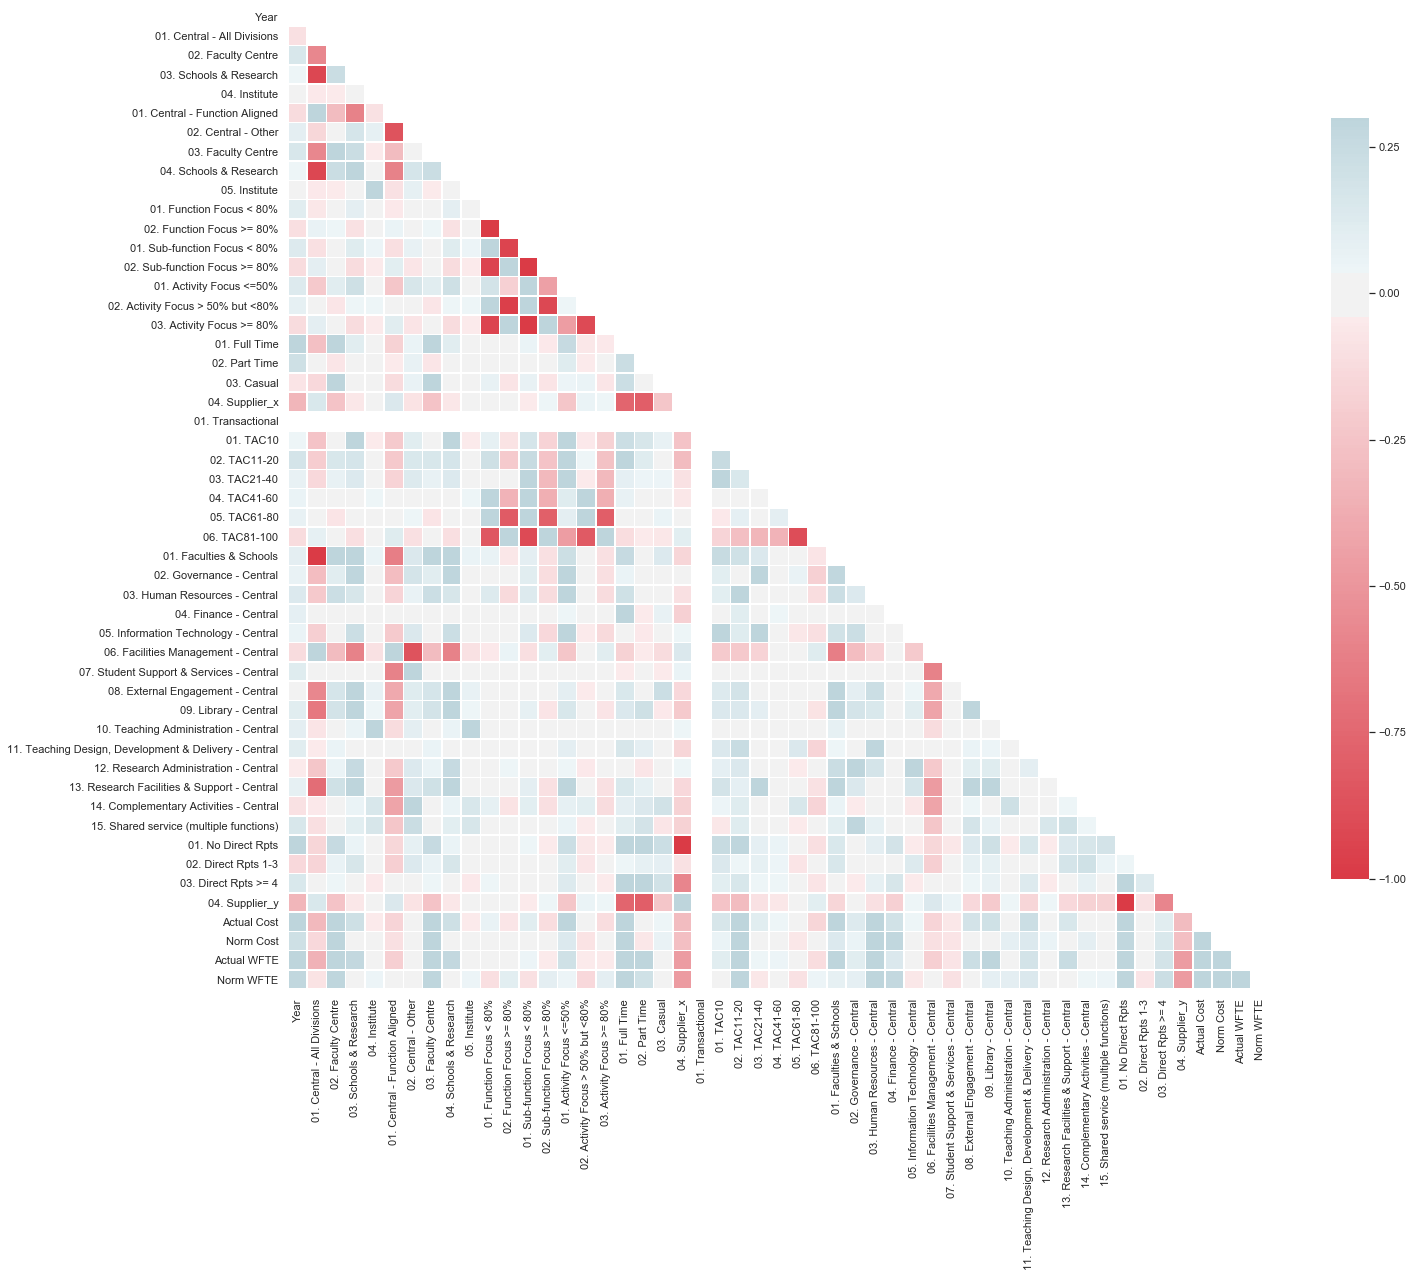

In [12]:
sn.set(style="white")

# Compute the correlation matrix
corr = all_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 28))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'Activity'

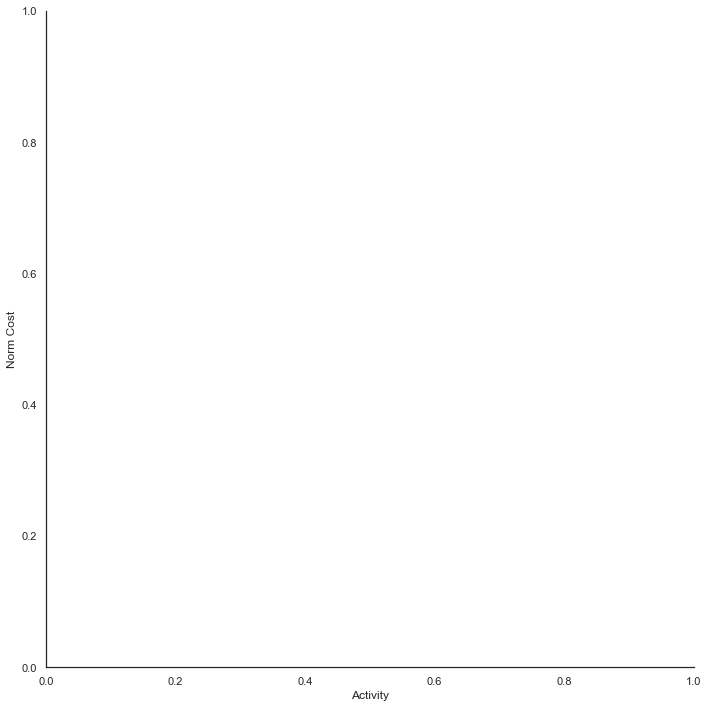

In [15]:
sn.pairplot(x_vars=["Activity"], y_vars=["Norm Cost"], data=all_data, hue="Region", size=10) #[all_data['Latest Activity Collection']=='Y']

In [16]:
all_data.columns

Index(['Year', 'Uni', 'Latest Activity Collection_x',
       '01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', '04. Institute',
       'Latest Activity Collection_y', '01. Central - Function Aligned',
       '02. Central - Other', '03. Faculty Centre', '04. Schools & Research',
       '05. Institute', '01. Function Focus < 80%',
       '02. Function Focus >= 80%', '01. Sub-function Focus < 80%',
       '02. Sub-function Focus >= 80%', '01. Activity Focus <=50%',
       '02. Activity Focus > 50% but <80%', '03. Activity Focus >= 80%',
       '01. Full Time', '02. Part Time', '03. Casual', '04. Supplier_x',
       '01. Transactional', '01. TAC10', '02. TAC11-20', '03. TAC21-40',
       '04. TAC41-60', '05. TAC61-80', '06. TAC81-100',
       '01. Faculties & Schools', '02. Governance - Central',
       '03. Human Resources - Central', '04. Finance - Central',
       '05. Information Technology - Central',
       '06. Facilities Management - Central',
  

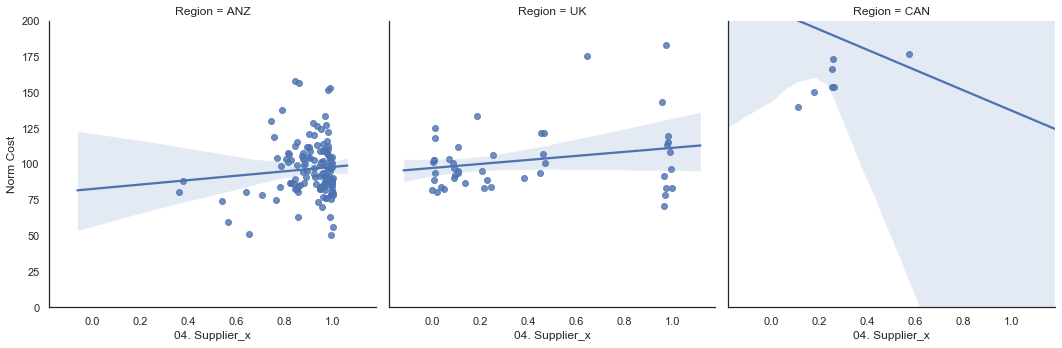

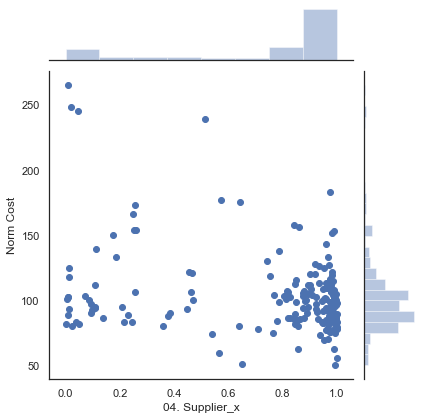

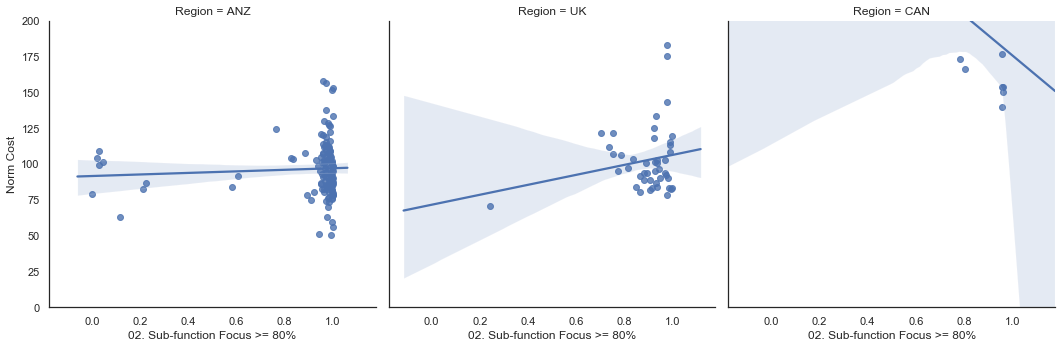

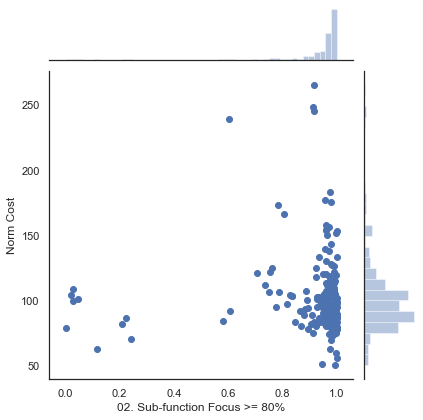

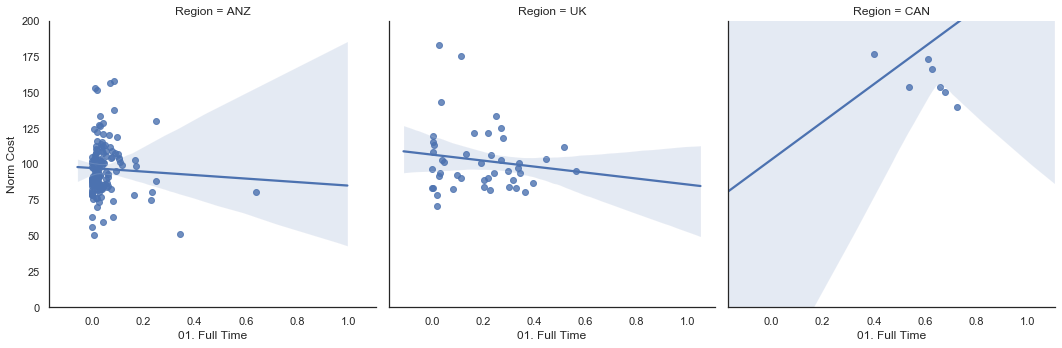

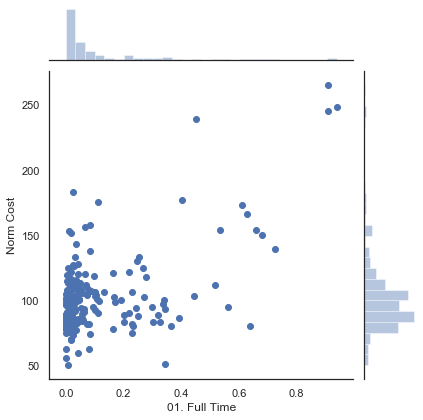

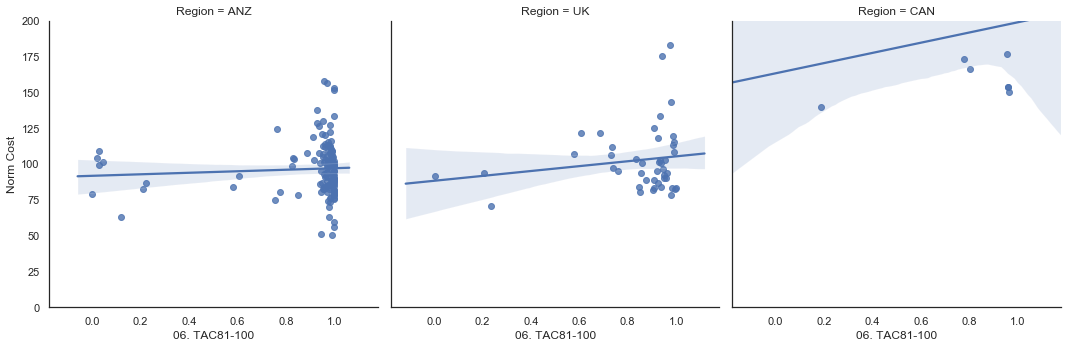

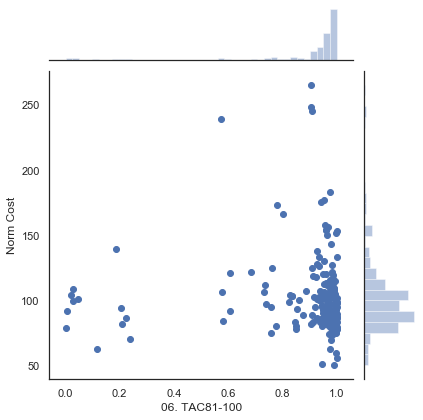

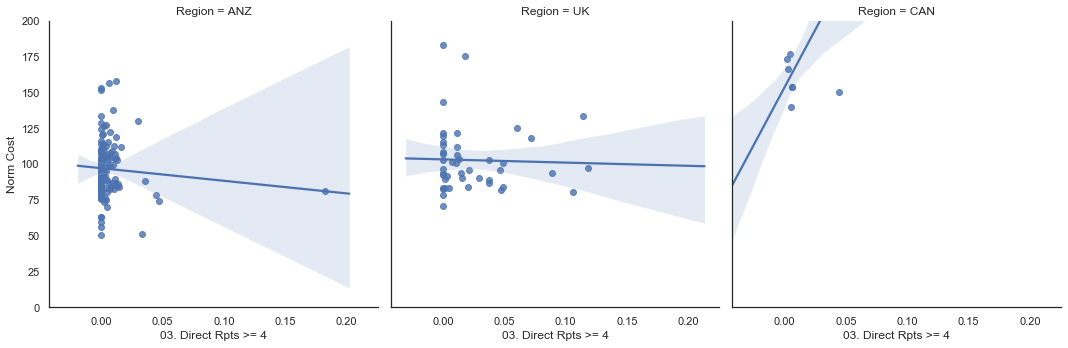

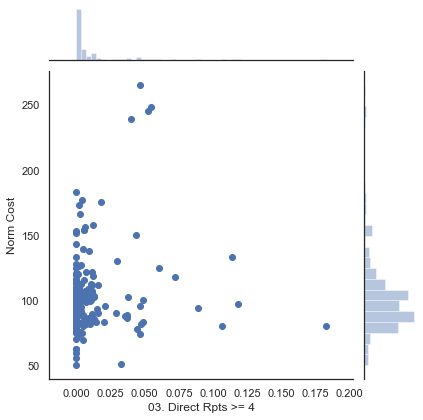

In [21]:
loop = ['04. Supplier_x','02. Sub-function Focus >= 80%','01. Full Time','06. TAC81-100','03. Direct Rpts >= 4']

for x in loop:
    focus_for_graph = x

    #[all_data['Latest Activity Collection']=='Y']
    g =sn.lmplot(x=focus_for_graph, y="Norm Cost", data=all_data, col="Region") #, hue='Shortlist'
    g = g.set(ylim=(0, 200)) #xlim=(0, 0.5),

    x = sn.jointplot(x=focus_for_graph, y="Norm Cost", data=all_data, kind="scatter")

In [22]:
#cell to get rid of columns that are very low
all_data.describe()

all_data.columns

,Year,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Full Time,02. Part Time,03. Casual,04. Supplier_x,01. Transactional,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. No Direct Rpts,02. Direct Rpts 1-3,03. Direct Rpts >= 4,04. Supplier_y,Actual Cost,Norm Cost,Actual WFTE,Norm WFTE
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,188.000000,187.000000,188.000000,187.000000
mean,2015.942029,0.963537,0.011026,0.024486,0.000950,0.910502,0.053035,0.011026,0.024486,0.000950,0.070805,0.929195,0.094561,0.905439,0.042998,0.053632,0.903369,0.120567,0.110783,0.018823,0.749827,1.0,0.007695,0.014594,0.015319,0.012343,0.064100,0.885948,0.036462,0.002826,0.000115,0.000433,0.003443,0.910502,0.014218,0.000870,0.000746,0.000004,0.000010,0.000355,0.000347,0.026362,0.003306,0.234435,0.005262,0.010477,0.749827,5.299994,103.664151,114.935354,99.492317
std,2.263368,0.077907,0.030052,0.065045,0.004668,0.151744,0.119354,0.030052,0.065045,0.004668,0.185282,0.185282,0.202708,0.202708,0.084291,0.181316,0.203434,0.190232,0.220443,0.039314,0.330548,0.0,0.011721,0.032339,0.062931,0.057657,0.193928,0.224893,0.077907,0.014710,0.000815,0.002700,0.018530,0.151744,0.096238,0.003810,0.003037,0.000057,0.000064,0.001954,0.002260,0.063045,0.020677,0.316664,0.013318,0.022872,0.330548,3.800677,31.634977,72.348224,40.983133
min,2012.000000,0.336141,0.000000,0.000000,0.000000,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000,0.032225,0.000000,0.000963,0.000000,0.000000,0.000963,0.000000,0.000000,0.000000,0.000390,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000963,0.000000,0.000000,0.000000,0.000000,0.000000,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,0.944911,50.414066,13.182160,23.391537
25%,2014.000000,0.963330,0.000000,0.000719,0.000000,0.886935,0.000351,0.000000,0.000719,0.000000,0.003611,0.966274,0.008780,0.932031,0.006832,0.000000,0.931138,0.017272,0.000000,0.001002,0.642656,1.0,0.001101,0.000000,0.000000,0.000000,0.000000,0.922376,0.004221,0.000000,0.000000,0.000000,0.000000,0.886935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020066,0.000000,0.000000,0.642656,3.094673,85.718311,60.741500,73.456489
50%,2016.000000,0.986749,0.000971,0.005505,0.000000,0.962055,0.007071,0.000971,0.005505,0.000000,0.014027,0.985973,0.027924,0.972076,0.020473,0.000000,0.971056,0.036695,0.009437,0.005068,0.923294,1.0,0.004302,0.004138,0.002164,0.000362,0.000000,0.968330,0.013251,0.000000,0.000000,0.000000,0.000000,0.962055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000027,0.000000,0.067369

Index(['Year', 'Uni', 'Latest Activity Collection_x',
       '01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', '04. Institute',
       'Latest Activity Collection_y', '01. Central - Function Aligned',
       '02. Central - Other', '03. Faculty Centre', '04. Schools & Research',
       '05. Institute', '01. Function Focus < 80%',
       '02. Function Focus >= 80%', '01. Sub-function Focus < 80%',
       '02. Sub-function Focus >= 80%', '01. Activity Focus <=50%',
       '02. Activity Focus > 50% but <80%', '03. Activity Focus >= 80%',
       '01. Full Time', '02. Part Time', '03. Casual', '04. Supplier_x',
       '01. Transactional', '01. TAC10', '02. TAC11-20', '03. TAC21-40',
       '04. TAC41-60', '05. TAC61-80', '06. TAC81-100',
       '01. Faculties & Schools', '02. Governance - Central',
       '03. Human Resources - Central', '04. Finance - Central',
       '05. Information Technology - Central',
       '06. Facilities Management - Central',
  

In [24]:
clustering_set = all_data[[
       '01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', 
       '01. Central - Function Aligned',
       '02. Central - Other', '01. Function Focus < 80%',
       '01. Sub-function Focus < 80%',
       '01. Activity Focus <=50%',
       '02. Activity Focus > 50% but <80%', '03. Activity Focus >= 80%',
       '01. Full Time', '02. Part Time', '03. Casual',
       '01. Transactional', '01. TAC10', '02. TAC11-20', '03. TAC21-40',
       '04. TAC41-60', '05. TAC61-80', '06. TAC81-100',
       '02. Governance - Central', '03. Human Resources - Central',
       '04. Finance - Central', '05. Information Technology - Central',
       '01. No Direct Rpts',
       '02. Direct Rpts 1-3', '03. Direct Rpts >= 4']]


clustering_set = all_data[[
       '01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', 
       '02. Central - Other', '01. Function Focus < 80%',
       '01. Sub-function Focus < 80%',
       '03. Activity Focus >= 80%',
       '01. Full Time']]

In [25]:
all_data.to_excel("alldata.xlsx")

### PCA Analysis

In [31]:
#Normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

#clustering_set = all_data[['Central','Function','Subfunction','Activity','Cost']].dropna()
clustering_set = preprocessing.normalize(all_data.select_dtypes(['number']).drop(columns=['Year','Norm Cost','Actual Cost','Actual WFTE', 'Norm WFTE'])).dropna()
clustering_set = preprocessing.MinMaxScaler(clustering_set)

clustering_set

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [38]:
clustering_set = all_data.select_dtypes(['number']).drop(columns=['Year','Norm Cost','Actual Cost','Actual WFTE', 'Norm WFTE'])
clustering_set.head(5)

preprocessing.MinMaxScaler(clustering_set)

,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Full Time,02. Part Time,03. Casual,04. Supplier_x,01. Transactional,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. No Direct Rpts,02. Direct Rpts 1-3,03. Direct Rpts >= 4,04. Supplier_y
0,0.993122,0.002670,0.004208,0.0,0.992757,0.000365,0.002670,0.004208,0.0,0.014458,0.985542,0.015182,0.984818,0.015182,0.000000,0.984818,0.034855,0.000000,0.004562,0.960582,1.0,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818,0.006878,0.0,0.0,0.0,0.0,0.992757,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000365,0.0,0.039418,0.000000,0.0,0.960582
1,0.993757,0.000000,0.006243,0.0,0.992810,0.000947,0.000000,0.006243,0.0,0.003557,0.996443,0.005976,0.994024,0.005976,0.000000,0.994024,0.024245,0.000000,0.003248,0.972507,1.0,0.001029,0.003873,0.001074,0.000000,0.000000,0.994024,0.006243,0.0,0.0,0.0,0.0,0.992810,0.0,0.0,0.0,0.0,0.0,0.000947,0.0,0.000000,0.0,0.026010,0.001483,0.0,0.972507
2,0.992768,0.001906,0.005326,0.0,0.992768,0.000000,0.001906,0.005326,0.0,0.000000,1.000000,0.003776,0.996224,0.003776,0.000000,0.996224,0.023637,0.000550,0.006042,0.969771,1.0,0.003776,0.000000,0.000000,0.000000,0.000000,0.996224,0.007232,0.0,0.0,0.0,0.0,0.992768,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.018360,0.011870,0.0,0.969771
3,0.992187,0.000493,0.007320,0.0,0.992187,0.000000,0.000493,0.007320,0.0,0.391574,0.608426,0.393763,0.606237,0.003074,0.390689,0.606237,0.022269,0.000156,0.007519,0.970056,1.0,0.002624,0.000000,0.000000,0.000450,0.390689,0.606237,0.007813,0.0,0.0,0.0,0.0,0.992187,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.028698,0.001246,0.0,0.970056
4,0.986749,0.000080,0.013171,0.0,0.986749,0.000000,0.000080,0.013171,0.0,0.417909,0.582091,0.419272,0.580728,0.001364,0.417909,0.580728,0.021357,0.000000,0.014106,0.964537,1.0,0.000000,0.001364,0.000000,0.000000,0.417909,0.580728,0.013251,0.0,0.0,0.0,0.0,0.986749,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.035463,0.000000,0.0,0.964537


MinMaxScaler(copy=True,
             feature_range=     01. Central - All Divisions  02. Faculty Centre  03. Schools & Research  \
0                       0.993122            0.002670                0.004208   
1                       0.993757            0.000000                0.006243   
2                       0.992768            0.001906                0.005326   
3                       0.992187            0.000493                0.007320   
4                       0.986749            0.000080                0.013171   
5                       0.991381            0.000000                0.008619   
6                       0.986547            0.000939                0.012514   
7                       0.981255            0.001906                0.016839   
8                       0.997648            0.000035                0.002317   
9                       0.968443            0.000000                0.031125   
10                      0....
194             0.002104              0

In [40]:
#MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

scaler.fit(clustering_set)

clustering_set = pd.DataFrame(scaler.fit_transform(clustering_set), columns=clustering_set.columns, index=clustering_set.index)
clustering_set

MinMaxScaler(copy=True, feature_range=(0, 1))

,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Full Time,02. Part Time,03. Casual,04. Supplier_x,01. Transactional,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. No Direct Rpts,02. Direct Rpts 1-3,03. Direct Rpts >= 4,04. Supplier_y
0,0.989639,0.012266,0.007139,0.000000,0.992734,0.000370,0.012266,0.007139,0.000000,0.014939,0.985061,0.015196,0.984804,0.015950,0.000000,0.984804,0.037134,0.000000,0.014847,0.960567,0.0,0.048598,0.023178,0.000000,0.003396,0.000000,0.984804,0.010361,0.000000,0.000000,0.000000,0.000000,0.992734,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000581,0.000000,0.039778,0.000000,0.000000,0.960567
1,0.990595,0.000000,0.010593,0.000000,0.992787,0.000959,0.000000,0.010593,0.000000,0.003675,0.996325,0.005982,0.994018,0.006278,0.000000,0.994018,0.025830,0.000000,0.010571,0.972496,0.0,0.011531,0.010811,0.001276,0.000000,0.000000,0.994018,0.009405,0.000000,0.000000,0.000000,0.000000,0.992787,0.000000,0.000000,0.000000,0.0,0.000000,0.053816,0.000000,0.000000,0.000000,0.026248,0.011048,0.000000,0.972496
2,0.989106,0.008753,0.009037,0.000000,0.992745,0.000000,0.008753,0.009037,0.000000,0.000000,1.000000,0.003780,0.996220,0.003967,0.000000,0.996220,0.025182,0.000580,0.019663,0.969759,0.0,0.042308,0.000000,0.000000,0.000000,0.000000,0.996220,0.010894,0.000000,0.000000,0.000000,0.000000,0.992745,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.018527,0.088412,0.000000,0.969759
3,0.988231,0.002263,0.012420,0.000000,0.992162,0.000000,0.002263,0.012420,0.000000,0.404613,0.595387,0.394143,0.605857,0.003230,0.410918,0.605857,0.023724,0.000165,0.024469,0.970045,0.0,0.029398,0.000000,0.000000,0.000602,0.410918,0.605857,0.011769,0.000000,0.000000,0.000000,0.000000,0.992162,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.028960,0.009280,0.000000,0.970045
4,0.980039,0.000370,0.022347,0.000000,0.986707,0.000000,0.000370,0.022347,0.000000,0.431824,0.568176,0.419676,0.580324,0.001433,0.439547,0.580324,0.022753,0.000000,0.045905,0.964523,0.0,0.000000,0.003807,0.000000,0.000000,0.439547,0.580324,0.019961,0.000000,0.000000,0.000000,0.000000,0.986707,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035787,0.000000,0.000000,0.964523
5,0.987017,0.000000,0.014624,0.000000,0.991354,0.000000,0.000000,0.014624,0.000000,0.000791,0.999209,0.003031,0.996969,0.003181,0.000000,0.996969,0.022665,0.000000,0.030613,0.969307,0.0,0.000000,0.006316,0.000000,0.001022,0.000000,0.996969,0.012983,0.000000,0.000000,0.000000,0.000000,0.991354,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.030961,0.000000,0.000000,0.969307
6,0.979735,0.004313,0.021233,0.000000,0.986313,0.000193,0.004313,0.021233,0.000000,0.000000,1.000000,0.002971,0.997029,0.003119,0.000000,0.997029,0.022428,0.000000,0.018136,0.973365,0.0,0.029619,0.000907,0.000000,0.000000,0.000000,0.997029,0.020265,0.000000,0.000000,0.006588,0.000000,0.986313,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025920,0.000000,0.005137,0.973365
7,0.971764,0.008756,0.

PCA-reduction with 1: Explained total variance: 0.352078759956902: Explained individual variance: [0.35207876]
PCA-reduction with 2: Explained total variance: 0.6170298541088873: Explained individual variance: [0.35207876 0.26495109]
PCA-reduction with 3: Explained total variance: 0.7137312829043421: Explained individual variance: [0.35207876 0.26495109 0.09670143]
PCA-reduction with 4: Explained total variance: 0.7601044111960148: Explained individual variance: [0.35207876 0.26495109 0.09670143 0.04637313]
PCA-reduction with 5: Explained total variance: 0.7937609171132692: Explained individual variance: [0.35207876 0.26495109 0.09670143 0.04637313 0.03365651]
PCA-reduction with 6: Explained total variance: 0.8207467624854076: Explained individual variance: [0.35207876 0.26495109 0.09670143 0.04637313 0.03365651 0.02698585]
PCA-reduction with 7: Explained total variance: 0.8406958226452114: Explained individual variance: [0.35207876 0.26495109 0.09670143 0.04637313 0.03365651 0.0269858

Text(0.5, 1.0, 'Total explained variance for PCA analysis')

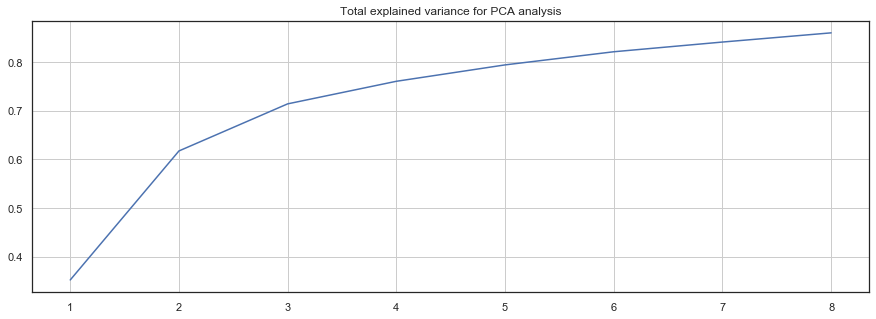

In [41]:
from sklearn.decomposition import PCA

max_clusters = 9

total_variance = []
for i in range(1,max_clusters):

    pca_comp = i

    pca = PCA(n_components= pca_comp)

    principalComponents = pca.fit_transform(clustering_set)

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = [("principal component " + str(x)) for x in range(1,pca_comp+1)])
    

    total_variance.append(sum(pca.explained_variance_ratio_))
    print("PCA-reduction with "+ str(pca_comp) + ": Explained total variance: " + str(sum(pca.explained_variance_ratio_)) + ": Explained individual variance: " + str(pca.explained_variance_ratio_))
    

# now print a graph

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, max_clusters), total_variance)
plt.grid(True)

plt.title('Total explained variance for PCA analysis')

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

original shape:    (207, 46)
transformed shape: (207, 3)


([<matplotlib.axis.YTick at 0x24a9ed2dc18>,
 <a list of 3 Text yticklabel objects>)

([<matplotlib.axis.XTick at 0x24a9c1cdf98>,
 <a list of 46 Text xticklabel objects>)

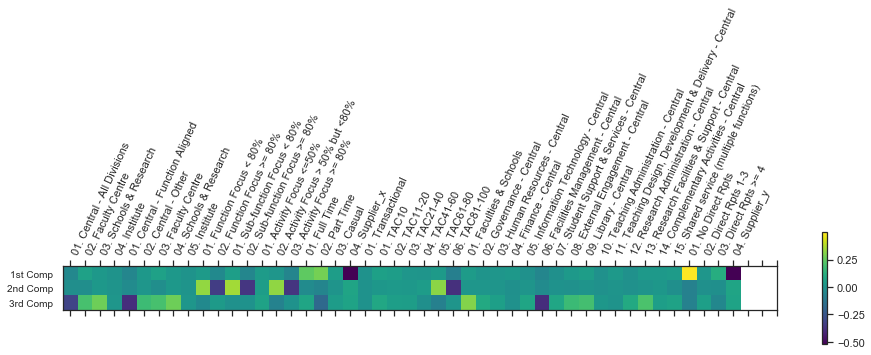

In [47]:
no_clusters = 3

pca = PCA(n_components= no_clusters)
principalComponents = pca.fit_transform(clustering_set)
pca.fit(clustering_set)

clustering_set_pca = pca.transform(clustering_set)
print("original shape:   ", clustering_set.shape)
print("transformed shape:", clustering_set_pca.shape)

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(all_data.select_dtypes(['number']).columns)-2),list(all_data.drop(columns=['Year','Norm Cost','Actual Cost','Actual WFTE', 'Norm WFTE']).select_dtypes(['number'])),rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

### K-means clustering

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Elbow curve')

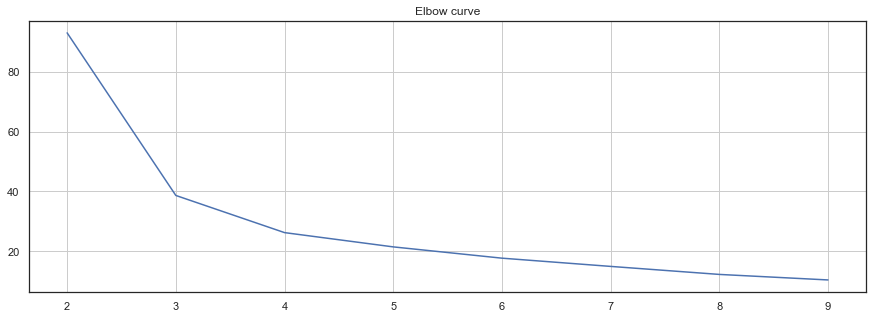

In [43]:
#Execute this cell if you want to use the PCA data
clustering_range = [2,10]

distorsions = []
for k in range(clustering_range[0], clustering_range[1]):
    kmeans = KMeans(n_clusters=k,init= 'k-means++', algorithm="full", n_jobs=1)
    kmeans.fit(clustering_set_pca) #
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(clustering_range[0], clustering_range[1]), distorsions)
plt.grid(True)
plt.title('Elbow curve')


##### Test how robust the dataset is for the clusters to be used

In [51]:
# Test to see how consistent the K_Means clustering is
k_means_cluster = 4

for i in range(0,10):

    kmeans = KMeans(n_clusters=k_means_cluster,init= 'k-means++', algorithm="full", n_jobs=1)
    kmeans.fit(clustering_set_pca)
    #print(kmeans.inertia_)

    kmeans.fit(clustering_set_pca)
    labels = kmeans.labels_

    # add cluster labels to the original dataset
    cluster_results = all_data.select_dtypes(['number'])
    cluster_results['KMeans Labels'] = [str(x) for x in labels]

    cluster_results.groupby('KMeans Labels').describe()['Norm Cost'][['count','50%']].sort_values('50%')

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
0,9.0,86.502642
1,133.0,94.929258
3,3.0,100.612656
2,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
0,9.0,86.502642
1,133.0,94.929258
3,3.0,100.612656
2,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
0,133.0,94.929258
3,3.0,100.612656
1,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
1,133.0,94.929258
3,3.0,100.612656
0,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
0,133.0,94.929258
3,3.0,100.612656
1,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
1,133.0,94.929258
3,3.0,100.612656
0,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
1,133.0,94.929258
3,3.0,100.612656
0,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
0,133.0,94.929258
3,3.0,100.612656
1,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
0,133.0,94.929258
3,3.0,100.612656
1,42.0,101.987786


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,9.0,86.502642
0,133.0,94.929258
3,3.0,100.612656
1,42.0,101.987786


##### Generate the clusters and save the data

In [52]:
k_means_cluster = 3

kmeans = KMeans(n_clusters=k_means_cluster,init= 'k-means++', algorithm="full", n_jobs=1)
kmeans.fit(clustering_set_pca)
print(kmeans.inertia_)

kmeans.fit(clustering_set_pca)
labels = kmeans.labels_

# add cluster labels to the original dataset
cluster_results = all_data #.dropna() #.select_dtypes(['number']) .drop(columns=['Year'])
cluster_results['KMeans Labels'] = [str(x) for x in labels]

cluster_results.groupby('KMeans Labels').describe()
cluster_results.groupby('KMeans Labels').describe().to_excel('kmeansanalysis.xlsx')
cluster_results.to_excel('All_cluster_data.xlsx')

cluster_results.groupby('KMeans Labels').describe()['Norm Cost'][['count','50%']].sort_values('50%')

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

38.66898952445651


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Year                                                         \
               count         mean       std     min     25%     50%     75%   
KMeans Labels                                                                 
0              149.0  2015.429530  2.248889  2012.0  2014.0  2015.0  2017.0   
1               47.0  2017.382979  1.713796  2012.0  2016.5  2017.0  2019.0   
2               11.0  2016.727273  1.678744  2014.0  2015.5  2017.0  2018.0   

                      01. Central - All Divisions                      \
                  max                       count      mean       std   
KMeans Labels                                                           
0              2020.0                       149.0  0.974905  0.043301   
1              2020.0                        47.0  0.929416  0.138796   
2              2019.0                        11.0  0.955348  0.034571   

                                                                 \
                    min       25%       50%       75%       max   
KMeans Labels                                                     
0              0.585224  0.966654  0.989649  0.996479  1.000000   
1              0.336141  0.944763  0.979403  0.995388  1.000000   
2              0.880502  0.937771  0.962187  0.983656  0.993414   

              02. Faculty Centre                                          \
                           count      mean       std  min  25%       50%   
KMeans Labels                                                              
0                          149.0  0.006218  0.012807  0.0  0.0  0.000971   
1                           47.0  0.027742  0.056007  0.0  0.0  0.000617   
2                           11.0  0.004726  0.006833  0.0  0.0  0.003460   

                                  03. Schools & Research                      \
                    75%       max                  count      mean       std   
KMeans Labels                                                                  
0              0.005531  0.065252                  149.0  0.018092  0.037419   
1              0.024640  0.217703                   47.0  0.041512  0.117195   
2              0.005396  0.023588                   11.0  0.038361  0.032722   

                                                           04. Institute  \
               min       25%       50%       75%       max         count   
KMeans Labels                                                              
0              0.0  0.000391  0.005075  0.021038  0.347844         149.0   
1              0.0  0.001618  0.006366  0.027301  0.589386          47.0   
2              0.0  0.010212  0.035543  0.060261  0.095910          11.0   

                                                                 \
                   mean       std  min  25%  50%  75%       max   
KMeans Labels                                                     
0              0.000784  0.004217  0.0  0.0  0.0  0.0  0.048805   
1              0.001329  0.006101  0.0  0.0  0.0  0.0  0.037427   
2              0.001565  0.003597  0.0  0.0  0.0  0.0  0.010629   

              01. Central - Function Aligned                                \
                                       count      mean       std       min   
KMeans Labels                                                                
0                                      149.0  0.929774  0.138680  0.003139   
1                                       47.0  0.855547  0.185833  0.197362   
2                                       11.0  0.884265  0.101794  0.651644   

                                                      02. Central - Other  \
                    25%       50%       75%       max               count   
KMeans Labels                                                               
0              0.934472  0.973992  0.992716  1.000000               149.0   
1              0.811846  0.928231  0.962556  0.999212                47.0   
2              0.824052  0.920351  0.955523  0.

,count,50%
KMeans Labels,,
2,9.0,86.502642
0,134.0,95.067476
1,44.0,100.945851


In [ ]:
#execute if you want to feed the model Raw data (non-PCA'ed)

clustering_range = [2,10]

distorsions = []
for k in range(clustering_range[0], clustering_range[1]):
    kmeans = KMeans(n_clusters=k,init= 'k-means++', algorithm="full", n_jobs=1)
    kmeans.fit(all_data.drop(columns=['Year','Norm Cost', 'Norm WFTE']).select_dtypes(['number']).dropna()) #Execute if you don't want to follow PCA analysi
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(clustering_range[0], clustering_range[1]), distorsions)
plt.grid(True)
plt.title('Elbow curve')

k_means_cluster = 5

kmeans = KMeans(n_clusters=k_means_cluster,init= 'k-means++', algorithm="full", n_jobs=1)
kmeans.fit(all_data.drop(columns=['Year','Norm Cost', 'Norm WFTE']).select_dtypes(['number']).dropna())
print(kmeans.inertia_)

kmeans.fit(all_data.drop(columns=['Year','Norm Cost', 'Norm WFTE']).select_dtypes(['number']).dropna())
labels = kmeans.labels_

C:\Users\bruno.henderyckx\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


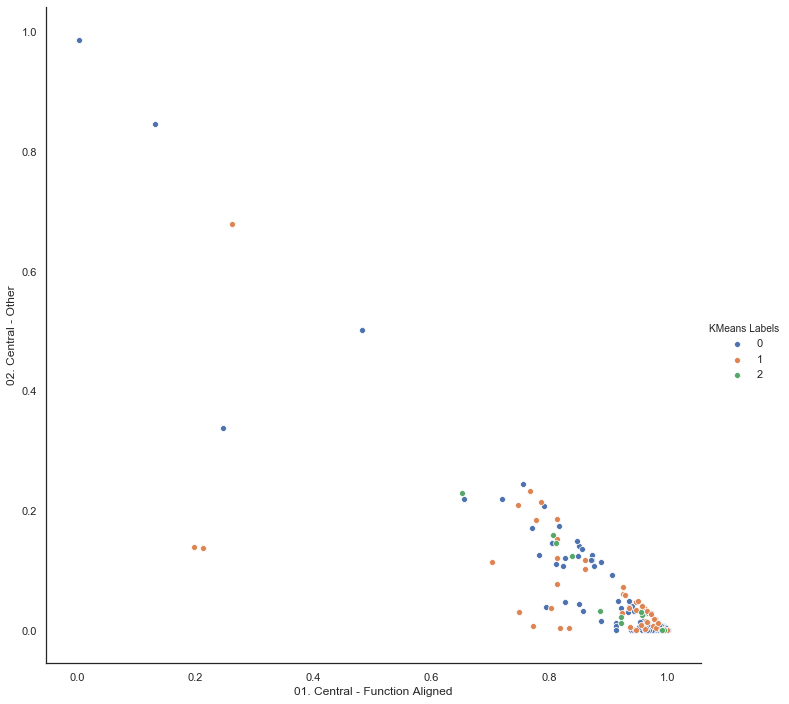

In [53]:
g = sn.pairplot(x_vars=["01. Central - Function Aligned"], y_vars=["02. Central - Other"], data=cluster_results, hue="KMeans Labels", size=10)
#g.set(xlim=(0,1), ylim = (80,200))

### Evolution of HR06, HR07 over time

In [ ]:
unimapping = pd.read_excel(r'C:\Users\bruno.henderyckx\Dropbox (UniForum)\Consulting\CAN\2020\6. Uni Specific\92U (CGY)\HR review\z_Drafts\200519.1 UniForum HR data dump.xlsx',sheet_name='Parameters')
unimapping.head(5)

In [ ]:
advisory_analysis = model[(model['Metric']=='HR06 Recruitment & Reappointment') | (model['Metric']=='HR07 Staffing Advice')][['Year','Uni','Metric','Actual Cost']].pivot_table(values='Actual Cost',index=['Year','Uni'], columns='Metric', aggfunc='sum').reset_index(drop=False)
advisory_analysis['Ratio Tx/NTx'] = advisory_analysis['HR06 Recruitment & Reappointment'] / advisory_analysis['HR07 Staffing Advice']
#advisory_analysis.head(5)
advisory_analysis = advisory_analysis[['Year','Uni','Ratio Tx/NTx']].pivot_table(values='Ratio Tx/NTx',index='Uni', columns='Year', aggfunc='sum').reset_index(drop=False).merge(unimapping, on='Uni')

#advisory_analysis[['Uni','Year']].groupby(by=['Uni']).agg('min')
#model[model['Metric']=='02. Human resources'].head(5)

g = sn.pairplot(x_vars=["Activity"], y_vars=["Norm Cost"], data=cluster_results, hue="KMeans Labels", size=10)
g.set(xlim=(0,1), ylim = (80,200))

In [ ]:
g = sn.pairplot(x_vars=["Ratio Tx/NTx"], y_vars=["Shortlist"], data=advisory_analysis.merge(unimapping, on='Uni'), hue="Shortlist", size=10)

In [ ]:
hrnorm = model[(model['Metric']=='020. Human Resources (Ops)')][['Year','Uni','Norm Cost']]#.pivot_table(values='Norm Cost',index='Uni', columns='Year', aggfunc='sum').reset_index(drop=False)
hrnorm = hrnorm[hrnorm['Uni']!='01H']
hrnorm.head(10)

In [ ]:
advisory_analysis = model[(model['Metric']=='HR06 Recruitment & Reappointment') | (model['Metric']=='HR07 Staffing Advice')][['Year','Uni','Metric','Actual Cost']].pivot_table(values='Actual Cost',index=['Year','Uni'], columns='Metric', aggfunc='sum').reset_index(drop=False)
advisory_analysis['Ratio Tx/NTx'] = advisory_analysis['HR06 Recruitment & Reappointment'] / advisory_analysis['HR07 Staffing Advice']
advisory_analysis = advisory_analysis[['Year','Uni','Ratio Tx/NTx']]
advisory_analysis.head(10)

In [ ]:
#advisory_analysis.merge(hrnorm, on=['Year','Uni']).corr()
g =sn.lmplot(x='01. Transactional', y="Norm Cost",col='KMeans Labels', height=10,col_wrap=3, data=cluster_results) # , hue=''   [cluster_results['Latest Activity Collection_x']=='Y']
g = g.set(ylim=(50, 180)) #xlim=(0, 0.5)
g.axhline(0)

In [ ]:
g =sn.lmplot(x='Norm Cost', y="01. Function Focus < 80%",col='KMeans Labels', height=10,col_wrap=3, data=cluster_results) # , hue=''   [cluster_results['Latest Activity Collection_x']=='Y']
g = g.set(ylim=(0, 1)) #xlim=(0, 0.5)

In [ ]:
g =sn.lmplot(x='Ratio Tx/NTx', y="Norm Cost", data=advisory_analysis_pctchange) #, hue='Shortlist'
advisory_analysis_pctchange.corr()
#g = g.set(ylim=(60, 180)) #xlim=(0, 0.5),

In [ ]:
g =sn.lmplot(x='HR06 Recruitment & Reappointment', y="HR07 Staffing Advice", data=model[(model['Metric']=='HR06 Recruitment & Reappointment') | (model['Metric']=='HR07 Staffing Advice')][['Year','Uni','Metric','Actual Cost']].pivot_table(values='Actual Cost',index='Year', columns=['Metric','Uni'], aggfunc='sum').diff().stack().reset_index(drop=False))
g = g.set(ylim=(-2, 2),xlim=(-2, 2))
model[(model['Metric']=='HR06 Recruitment & Reappointment') | (model['Metric']=='HR07 Staffing Advice')][['Year','Uni','Metric','Actual Cost']].pivot_table(values='Actual Cost',index='Year', columns=['Metric','Uni'], aggfunc='sum').diff().stack().reset_index(drop=False).corr()

In [ ]:
model.head(10)

### Relative comparison of spend on different HR activities compared to HR Ops Norm Cost

In [ ]:
model.head(5)
sdm.head(5)

In [ ]:
relative_spend_on_activities = sdm[sdm['Function Alignment']=='01. Central - Function Aligned']
relative_spend_on_activities.head(10)

In [ ]:
# Calculate relative spending on different activities within Central HR
relative_spend_on_activities.pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum').apply(lambda x: x / float(x.sum()), axis=1)

relative_spend_on_activities.pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum').apply(lambda x: x / float(x.sum()), axis=1).describe()

In [ ]:
# Latest collection data of relative HR spend

relative_spend_on_activities[relative_spend_on_activities['Latest Activity Collection']=='Y'].pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum').apply(lambda x: x / float(x.sum()), axis=1)
relative_spend_on_activities[relative_spend_on_activities['Latest Activity Collection']=='Y'].pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum').apply(lambda x: x / float(x.sum()), axis=1).describe()

# Latest collection data of absolute HR spend
relative_spend_on_activities[relative_spend_on_activities['Latest Activity Collection']=='Y'].pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum')
relative_spend_on_activities[relative_spend_on_activities['Latest Activity Collection']=='Y'].pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum').describe()

In [ ]:
# Save as excel
relative_spend_on_activities[relative_spend_on_activities['Latest Activity Collection']=='Y'].pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum').apply(lambda x: x / float(x.sum()), axis=1).reset_index(drop=False).to_excel('CentralHRComposition.xlsx')

In [ ]:
relative_spend_on_activities[relative_spend_on_activities['Latest Activity Collection']=='Y'].pivot_table(values='Own Uni - Cost (M)',index=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name'], columns=['Activity Name','Activity Type'], aggfunc='sum').reset_index(drop=False)

In [ ]:
relative_spend_on_activities[relative_spend_on_activities['Latest Activity Collection']=='Y'].groupby(by=['Year','Region','University Code','Latest Activity Collection','Service Grouping Name']).sum()

In [ ]:
model[model['Uni']=='87Fr']